# **Digital Assignment 3**
# **Regression Analysis Lab**

## Name: Soumyadeep Ganguly
## Reg No: 24MDT0082

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## **1. Data Preparation**

In [5]:
df = pd.read_csv('bloodpress.csv')
df.head()

,Pt,BP,Age,Weight,BSA,Duration,Pulse,Stress
0,1,105,47,85.4,1.75,5.1,63,33
1,2,115,49,94.2,2.10,3.8,70,14
2,3,116,49,95.3,1.98,8.2,72,10
3,4,117,50,94.7,2.01,5.8,73,99
4,5,112,51,89.4,1.89,7.0,72,95


In [6]:
X_age = df['Age']
X_weight = df['Weight']
X_duration = df['Duration']
Y_bp = df['BP']

## **2. Simple Linear Regression**

In [7]:
def simple_linear_regression(X, Y, predictor_name):
    X = sm.add_constant(X)  # Add intercept
    model = sm.OLS(Y, X).fit()
    print(f"\nRegression Summary for BP ~ {predictor_name}")
    print(model.summary())
    
    # Scatter plot with regression line
    plt.figure(figsize=(6, 4))
    sns.regplot(x=X[predictor_name], y=Y, scatter_kws={'alpha': 0.5})
    plt.xlabel(predictor_name)
    plt.ylabel('BP')
    plt.title(f'BP vs {predictor_name}')
    plt.show()
    
    return model.resid


Regression Summary for BP ~ Age
                            OLS Regression Results                            
Dep. Variable:                     BP   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     13.82
Date:                Fri, 14 Mar 2025   Prob (F-statistic):            0.00157
Time:                        14:48:57   Log-Likelihood:                -56.002
No. Observations:                  20   AIC:                             116.0
Df Residuals:                      18   BIC:                             118.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.45

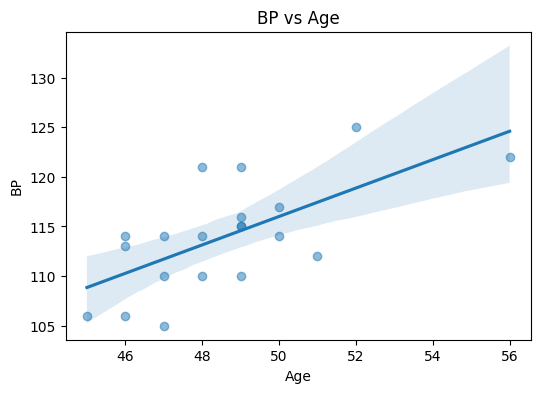


Regression Summary for BP ~ Weight
                            OLS Regression Results                            
Dep. Variable:                     BP   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     166.9
Date:                Fri, 14 Mar 2025   Prob (F-statistic):           1.53e-10
Time:                        14:48:57   Log-Likelihood:                -38.409
No. Observations:                  20   AIC:                             80.82
Df Residuals:                      18   BIC:                             82.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2

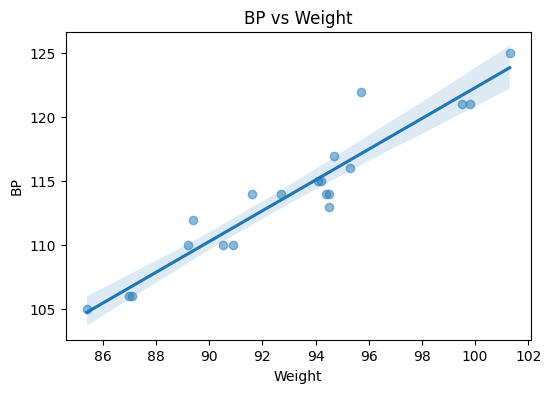


Regression Summary for BP ~ Duration
                            OLS Regression Results                            
Dep. Variable:                     BP   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     1.688
Date:                Fri, 14 Mar 2025   Prob (F-statistic):              0.210
Time:                        14:48:58   Log-Likelihood:                -60.804
No. Observations:                  20   AIC:                             125.6
Df Residuals:                      18   BIC:                             127.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1

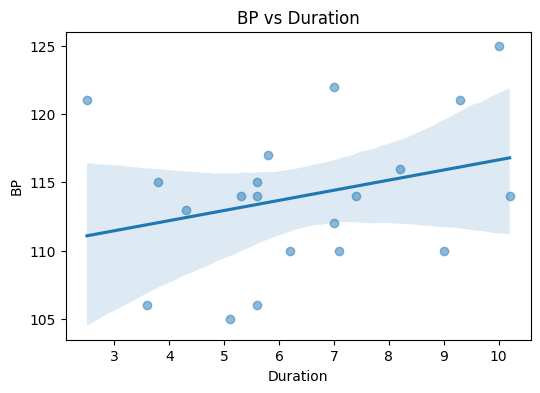

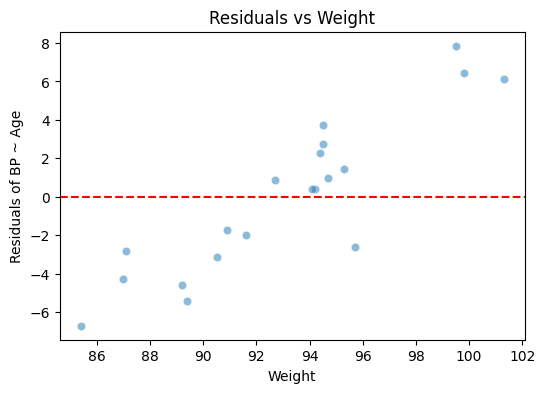

In [8]:
# Perform simple linear regressions and collect residuals
resid_age = simple_linear_regression(X_age, Y_bp, 'Age')
simple_linear_regression(X_weight, Y_bp, 'Weight')
simple_linear_regression(X_duration, Y_bp, 'Duration')

# Plot residuals of BP ~ Age against Weight
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Weight'], y=resid_age, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Weight')
plt.ylabel('Residuals of BP ~ Age')
plt.title('Residuals vs Weight')
plt.show()

## **3. Multiple Linear Regression**

In [ ]:
X_multi = df[['Age', 'Weight']]
X_multi = sm.add_constant(X_multi)  
model_multi = sm.OLS(Y_bp, X_multi).fit()

In [13]:
print("\nMultiple Linear Regression Summary (BP ~ Age + Weight)")
print(model_multi.summary())


Multiple Linear Regression Summary (BP ~ Age + Weight)
                            OLS Regression Results                            
Dep. Variable:                     BP   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     978.2
Date:                Fri, 14 Mar 2025   Prob (F-statistic):           2.81e-18
Time:                        15:01:34   Log-Likelihood:                -14.157
No. Observations:                  20   AIC:                             34.31
Df Residuals:                      17   BIC:                             37.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

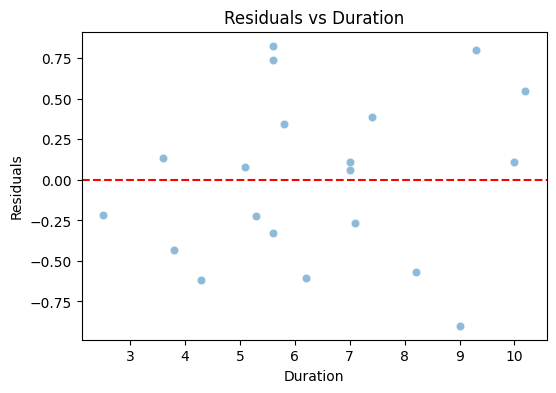

In [11]:
# Plot residuals of multiple regression against Duration
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Duration'], y=model_multi.resid, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Duration')
plt.ylabel('Residuals')
plt.title('Residuals vs Duration')
plt.show()

# **Observations**

1. **Simple Linear Regression:**
   - Age, Weight, and Duration were separately regressed against BP.
   - The scatter plots indicate whether the relationships are linear.
   - The regression summaries show the significance of each predictor.

2. **Residual Analysis:**
   - The residuals of `BP ~ Age` were plotted against Weight.
   - If residuals show patterns, it may indicate missing predictors or non-linearity.

3. **Multiple Linear Regression:**
   - Age and Weight were used together to predict BP.
   - The regression summary indicates whether both predictors significantly contribute to BP variation.
   - Residuals of this model were plotted against Duration.


# **Conclusion**
- If a predictor has a high p-value, it may not be a strong determinant of BP.
- A high R² value in multiple regression suggests that Age and Weight explain a large portion of BP variation.
- If residuals are randomly distributed, the linear model is appropriate.
- If patterns exist in residuals, a more complex model may be needed (e.g., non-linear regression or additional predictors).